<a href="https://colab.research.google.com/github/siddharthchd/Tensorflow_Developer/blob/main/Natural_Language_Processing/bbc_news_archive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-01-16 02:25:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2021-01-16 02:25:59 (196 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [98]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [99]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [100]:
with open('/tmp/bbc-text.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords:
      token = ' ' + word  + ' '
      sentence = sentence.replace(token, ' ')
    sentences.append(sentence)

print(labels[2], ' : ', sentences[2])

sport  :  tigers wary farrell  gamble  leicester say will not rushed making bid andy farrell great britain rugby league captain decide switch codes.   anybody else involved process still way away going next stage   tigers boss john wells told bbc radio leicester.  moment  still lot unknowns andy farrell  not least medical situation.  whoever take going take big  big gamble.  farrell  persistent knee problems  operation knee five weeks ago expected another three months. leicester saracens believed head list rugby union clubs interested signing farrell decides move 15-man game.  move across union  wells believes better off playing backs  least initially.  m sure make step league union involved centre   said wells.  think england prefer progress position back row can make use rugby league skills within forwards.  jury whether can cross divide.  club  balance will struck cost gamble option bringing ready-made replacement.


In [101]:
#labels.pop(0)
#sentences.pop(0)
print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [102]:
train_size = int(len(labels) * training_portion)

train_sentences = sentences[0 : train_size]
train_labels = labels[0 : train_size]

validation_sentences = sentences[train_size :]
validation_labels = labels[train_size :]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [103]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

train_padded = np.array(train_padded)
train_labels = np.array(train_labels)

print(len(train_sequences[0]))
print(len(train_padded[0]))
print(len(train_sequences[1]))
print(len(train_padded[1]))
print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [104]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [105]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [108]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(6, activation = 'softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_7 ( (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [112]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs = num_epochs, validation_data = (validation_padded, validation_label_seq), verbose = 2)

Epoch 1/30
56/56 - 1s - loss: 1.7629 - accuracy: 0.3949 - val_loss: 1.7249 - val_accuracy: 0.5528
Epoch 2/30
56/56 - 0s - loss: 1.6697 - accuracy: 0.4562 - val_loss: 1.6084 - val_accuracy: 0.4517
Epoch 3/30
56/56 - 0s - loss: 1.5238 - accuracy: 0.4449 - val_loss: 1.4425 - val_accuracy: 0.4562
Epoch 4/30
56/56 - 0s - loss: 1.3336 - accuracy: 0.5174 - val_loss: 1.2560 - val_accuracy: 0.4764
Epoch 5/30
56/56 - 0s - loss: 1.1487 - accuracy: 0.5197 - val_loss: 1.1041 - val_accuracy: 0.5483
Epoch 6/30
56/56 - 0s - loss: 0.9986 - accuracy: 0.6202 - val_loss: 0.9785 - val_accuracy: 0.6247
Epoch 7/30
56/56 - 0s - loss: 0.8652 - accuracy: 0.7326 - val_loss: 0.8618 - val_accuracy: 0.7663
Epoch 8/30
56/56 - 0s - loss: 0.7359 - accuracy: 0.8573 - val_loss: 0.7436 - val_accuracy: 0.8270
Epoch 9/30
56/56 - 0s - loss: 0.6113 - accuracy: 0.9073 - val_loss: 0.6358 - val_accuracy: 0.8831
Epoch 10/30
56/56 - 0s - loss: 0.5009 - accuracy: 0.9197 - val_loss: 0.5409 - val_accuracy: 0.8899
Epoch 11/30
56/56 -

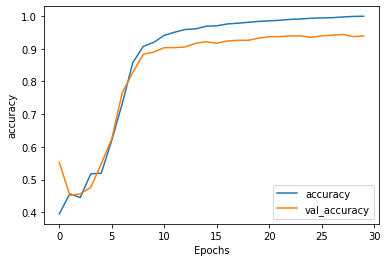

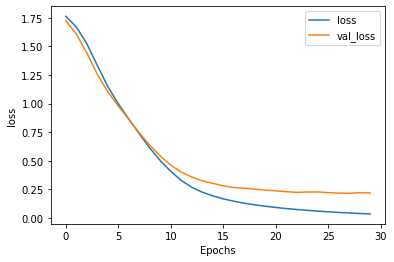

In [113]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [114]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [115]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [116]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [117]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>